In this dataset we are predicting the house prices(dependent variable) with Independent variables (House Size, Distance, etc).
As Linear Regression is used to predict the relationship between dependent and independent variables we are using the same for predicting the prices of houses.

In [ ]:
Assumptions of Linear Regression:
(i)Linear relationship.
(ii)Multivariate normality.
(iii)No or little multicollinearity.
(iv)No auto-correlation.
(v)Homoscedasticity.

In [1]:
import numpy as np                     #loading the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
reg=pd.read_excel("C:/Users/choub/Downloads/DS - Assignment Part 1 data set.xlsx")

In [5]:
reg

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [7]:
reg.info()   #checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [17]:
reg.drop('Transaction date',axis=1,inplace=True)  #dropping the column Transaction Date as it is irrelevant
reg

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [19]:
reg.describe()    #getting the mean, minimum and maximum values

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


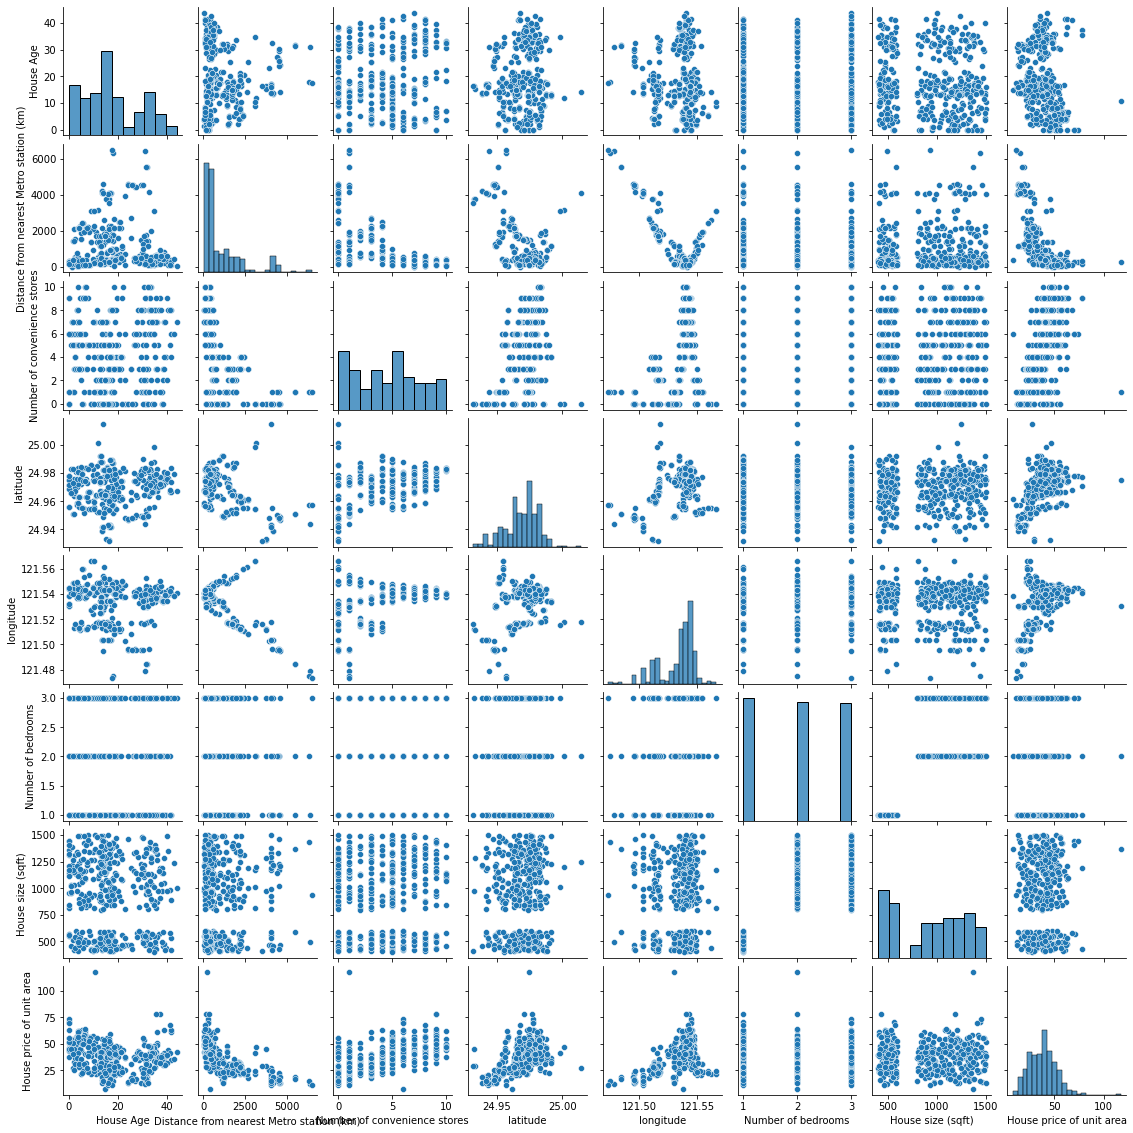

In [18]:
sns.pairplot(reg,height=2)

In [21]:
reg.corr()       #getting the correlation to check the correlation between variables

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

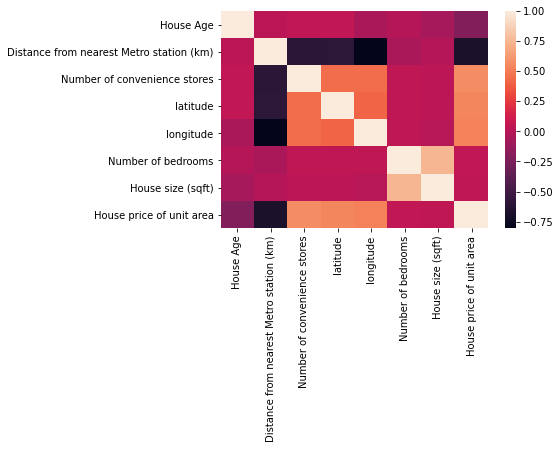

In [22]:
sns.heatmap(reg.corr())         #using heatmap to check the correlation 

In [23]:
from sklearn.preprocessing import StandardScaler   #importing required libraries for regression
r=StandardScaler().fit(reg)
reg1=r.transform(reg)

In [24]:
reg2=pd.DataFrame(reg1)
reg2

,0,1,2,3,4,5,6,7
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732
...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,1.237432,-0.368666,-1.661525
410,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.014766,0.994363,0.884457
411,0.095568,-0.549678,0.987694,0.822893,0.423972,-1.207899,-1.229526,0.192774
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814,-1.207899,-0.959790,1.068415


In [26]:
X=reg2.iloc[:,:-1].values    #representing the independent variables as X
Y=reg2.iloc[:,7]             #representing the dependent variables as Y

In [27]:
print(Y)

0     -0.005901
1      0.310507
2      0.685782
3      1.237656
4      0.376732
         ...   
409   -1.661525
410    0.884457
411    0.192774
412    1.068415
413    1.907264
Name: 7, Length: 414, dtype: float64


In [28]:
print(X)           

[[ 1.25562833 -0.79249504  2.00740743 ...  0.44876222 -1.20789893
  -1.0229196 ]
 [ 0.15708622 -0.61661163  1.66750286 ...  0.40113894  0.01476649
   0.88532059]
 [-0.38779067 -0.41401527  0.30788458 ...  0.68818339  1.23743191
   0.36880445]
 ...
 [ 0.09556786 -0.54967846  0.98769372 ...  0.42397202 -1.20789893
  -1.22952606]
 [-0.84478419 -0.77668389  0.30788458 ...  0.4768143  -1.20789893
  -0.95978985]
 [-0.98539758 -0.78807071  1.66750286 ...  0.63534112  0.01476649
   0.47497721]]


In [83]:
from sklearn.model_selection import train_test_split    #importing the libraries for splitting the data and splitting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=80,random_state=1)

In [84]:
from sklearn.linear_model import LinearRegression   #importing the linear regression library and fitting the model
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [85]:
Y_pred_test=model.predict(X_test)     #fitting the test model
Y_pred_test

array([-0.40493874,  0.70188209, -1.07022142, -1.71337137,  0.4436909 ,
       -0.41359997, -0.55524172,  0.458676  ,  0.06577845, -1.89464755,
       -1.78468382,  0.01836945, -0.57132518,  0.52628219,  1.02426735,
       -0.35351226,  0.44376183,  0.34587642, -0.52068401,  0.5927798 ,
        1.02667954, -0.60938781,  0.17899067,  0.79766137,  0.56939426,
       -0.68262938, -0.3400566 ,  0.55946764,  0.69884365, -1.70088762,
       -0.17339622, -0.27047302,  0.20009295,  0.51741938,  0.74174025,
       -1.74853033,  0.1863519 ,  0.13135846,  0.03894514, -1.6919495 ,
        0.24166851, -1.00808574,  1.0165128 , -0.26663266, -0.34021827,
        0.08746973, -0.444182  ,  0.18640146,  0.42416234, -0.30686764,
       -1.73320253,  0.33602117,  0.68137611, -1.69742475,  1.00113832,
        0.37764368,  0.46005231,  0.1110531 ,  0.15753093,  0.2708721 ,
       -1.00244932,  0.1906395 , -0.35703851, -1.78026922,  0.10518047,
        0.40348769,  0.02035144,  0.55535213, -1.68937291,  0.08

In [86]:
print("Intercept:",model.intercept_)

Intercept: -4.462664723406039e-14


In [87]:
print("Coefficients:",model.coef_)

Coefficients: [-0.22351847 -0.39777924  0.25054542  0.21569759 -0.00970774 -0.010009
  0.02615489]


In [88]:
Y_pred_train=model.predict(X_train)  #fitting the train model
Y_pred_train

array([ 0.52015017,  0.18584439, -1.72482947, -0.38836996,  0.29471871,
       -2.14306708, -0.29703804,  0.55641311,  0.5702729 ,  0.92542706,
       -0.87933955, -0.55833036, -1.65045086,  0.06259149, -0.19080785,
        0.07274987,  0.30871541, -1.75178566, -0.03005872,  0.34031045,
       -0.38807634, -1.74408765, -0.41846567,  0.02242048, -0.43610832,
       -0.1187343 , -0.14116526, -0.24322046,  0.07302447,  0.55241584,
        0.78682068, -0.13831167,  0.30538919,  0.69567717,  0.63814913,
        1.17404519, -1.87246521,  0.1869483 , -1.92456701,  0.24999164,
        0.04740498,  0.30443545, -0.45718649,  0.13399669,  0.37385946,
        0.5673417 ,  0.84387436,  0.51565895, -0.57113961,  0.10544111,
       -0.26301313,  0.57177213,  0.0851833 , -0.40763077, -0.71959727,
        0.51055427,  0.54310488,  0.30576923,  0.1757541 , -1.00893634,
        1.05443014,  1.00195978,  0.87212454,  0.01370225,  0.50002883,
        1.08425903,  0.41881301, -0.02146462, -0.20812327,  0.33

In [89]:
print("Intercept:",model.intercept_)    
print("Coefficients:",model.coef_)

Intercept: -4.462664723406039e-14
Coefficients: [-0.22351847 -0.39777924  0.25054542  0.21569759 -0.00970774 -0.010009
  0.02615489]


In [90]:
from sklearn import metrics                     #importing the metrics library for getting MAE and MSE
MAE_train=metrics.mean_absolute_error(Y_train,Y_pred_train)    #MAE value for train and test dataset
MAE_test=metrics.mean_absolute_error(Y_test,Y_pred_test)
print("MAE for train data is: {}".format(MAE_train))
print("MAE for test data is {}".format(MAE_test))

MAE for train data is: 0.4194755292908788
MAE for test data is 0.46306693898742407


In [91]:
MSE_train=metrics.mean_squared_error(Y_train,Y_pred_train)   #MSE value for train and test dataset
MSE_test=metrics.mean_squared_error(Y_test,Y_pred_test)
print("MSE for train data is: {}".format(MSE_train))
print("MSE for test data is {}".format(MSE_test))

MSE for train data is: 0.290407407824781
MSE for test data is 0.4615172923866225


In [92]:
RMSE_train=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))   #RMSE value for train and test dataset
RMSE_test=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
print("RMSE for train data is: {}".format(RMSE_train))
print("RMSE for test data is {}".format(RMSE_test))

RMSE for train data is: 0.5388946166225648
RMSE for test data is 0.6793506402342037


In [93]:
Yhat = model.predict(X_train)                     #Rsq and Adjusted R sq value for train dataset
SS_Residual = sum((Y_train-Yhat)**2)
SS_Total = sum((Y_train-np.mean(Y_train))**2)
R_Square =1-(float(SS_Residual))/SS_Total
Adj_R_Square = 1-(1-R_Square)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

In [94]:
print(R_Square,Adj_R_Square)

0.6219835437414308 0.5852319438274033


In [95]:
Y_hat = model.predict(X_test)                 #Rsq and Adjusted R sq value for test dataset
SS_Residual = sum((Y_test-Y_hat)**2)
SS_Total = sum((Y_test-np.mean(Y_test))**2)
R_Square =1-(float(SS_Residual))/SS_Total
Adj_R_Square = 1-(1-R_Square)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

In [75]:
print(R_Square,Adj_R_Square)

0.5616130529088192 0.5189920997193989


The R-square value for training dataset is 62% and Adjusted R-square value is 58%.
The R-square value for test dataset is 56% and Adjusted R-Square value for test dataset is 51%.
Hence we can say from the above result we can conclude that the house prices can be predicted by the independent variables as the R square value is more than 50%. Though the value is lesser the prices can be predicted and hence the regression method can be used for predicting the values.
